**Problem 1]** Draw the Moment-Curvature relationship graph of a beam with given different cases
***
### Given / Assumptions:<br>

#### <u>Properties</u>
$$
f'c = 21 MPa
$$
$$
fy = 275 MPA
$$
$$
fr = 0.7\sqrt{f'c} = 3.20 MPA
$$
$$
Es = 200,000 MPa
$$
$$
Ec = 4,700 \sqrt{f'c}
$$
$$
Ec = 21,538.10 MPa
$$
$$
\eta = \frac{Es}{Ec} = 9.28
$$


#### <u>Geometric Properties</u>
$$ 
b   = 300 mm
$$
$$ 
h   = 450 mm 
$$
$$ 
d'   = 40 mm 
$$
$$ 
d   = h - d' 
$$

**<center>General Cases</center>**

<table>
    <thead>
        <th>Case</th>
        <th>As (tension)</th>
        <th>As' (compression)</th>
    </thead>
    <tbody>
        <tr>
            <td>Case 1</td>
            <td>Asb</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Case 2</td>
            <td>0.5 Asb</td>
            <td>0</td>
        </tr>
        <tr>
            <td>Case 3</td>
            <td>0.75 Asb</td>
            <td>0.25 Asb</td>
        </tr>
    </tbody>
</table>


In [1]:
from sympy import *
import math
import matplotlib.pyplot as plt

modular_ratio = Symbol(u"\u03B7")
beta_symbol = Symbol(u"\u03B2")
rho_symbol = Symbol(u"\u03C1")
epsilon_symbol = Symbol(u"\u03B5")

In [2]:
# Variable declarations
beam_width = 300
beam_height = 450
clearance = 50
effective_depth = beam_height - clearance
fcprime = 21
fy = 275
fr = 0.7 * math.sqrt(fcprime)
Es = 200000
Ec = 4700 * math.sqrt(fcprime)
B1 = 0.85
n = Es / Ec

# =========================================
# Create methods
# =========================================
def solveLo(case_no, 𝜆):
    if case_no ==1:
        return 0.85 / 3 * 𝜆 * (3 - 𝜆)
    else:
        return 0.85 * (3*𝜆 - 1) / (3 * 𝜆)

print("Ec = " + str(round(Ec, 2)) + " MPa")
print(str(modular_ratio) + " = " + str(round(n, 2)))

Ec = 21538.11 MPa
η = 9.29


### Calculate the Asb
---

In [3]:
pb = (0.85 * fcprime * B1 * 600) / (fy * (600 + fy))
print(str(rho_symbol) + "b = " + str(round(pb, 5)))
Asb = pb * beam_width * effective_depth
print("Asb = " + str(round(Asb, 2)) + "mm^2")

# =========================================
# Define arrays for variables of each case
# =========================================
As = (Asb, 0.5*Asb, 0.75*Asb)       # Area of steel at tension
Asp = (0.0, 0.0, 0.25*Asb)

data_case_1_phi = []                    # List of data for plotting the case 1
data_case_1_m = []

ρb = 0.03783
Asb = 4539.93mm^2


### For Case 1
---

In [4]:
# Add initial data
data_case_1_phi.append(0)
data_case_1_m.append(0)

# Total area of section
At = beam_width * beam_height + (n-1) * As[0]

# Centroid (neutral axis) from the tension fiber
ybar = (beam_width * beam_height * (0.5 * beam_height) + ((n-1) * As[0] * clearance)) / At

# Compression block height
kd = beam_height - ybar

# Moment of inertia (uncracked)
Iuc = (beam_width * kd ** 3 / 12) + (beam_width * kd * (kd/2)**2) +  (beam_width * ybar ** 3 / 12) +\
      (beam_width * ybar * (ybar/2)**2) + ((n-1)*As[0] * clearance**2)

# Calculate the cracking moment, Mcr
Mcr = fr * Iuc / ybar

# Calculate the strain at tension fiber
Epc = fr / Ec

# Calculate the curvature before cracking
Phi = Epc / ybar

# Append data to curve of case 1
data_case_1_phi.append(Phi)
data_case_1_m.append(Mcr)
print("Mcr = ", round(Mcr/1000**2, 2), "ϕu = ", Phi, "ⲉu = ", Epc, "kd = ", round(kd, 2), " mm")

# Calculate moment of inertia after cracking occurs
nAs = n * Asb
# kd^2 + (150 * nAs)kd - 60000 nAs = 0
kd_a = 150
kd_b = nAs
kd_c = 400 * nAs * (-1)
kd_d = (kd_b**2) - (4 * kd_a * kd_c)               # Discriminant
kd = (-1 * kd_b + math.sqrt(kd_d)) / (2 * kd_a)    # New value of kd

print("=========================================")
print("Moment of Inertia for cracked section")
print("=========================================")
Icr = (beam_width * kd**3 / 12) +\
      (beam_width * kd * (kd/2)**2) +\
      (nAs * (effective_depth - kd)**2)
print("Icr = ", Icr, " mm^4")

# Calculate curvature after cracking
Phi = Mcr / (Ec * Icr)
ⲉcr = Phi * kd
print("Mcr = ", round(Mcr/1000**2, 2), "ϕcr = ", Phi, "ⲉcr = ", ⲉcr, "kd = ", round(kd, 12), " mm")

# Append data to curve of case 1
data_case_1_phi.append(Phi)
data_case_1_m.append(Mcr)
# =========================================
# End of Elastic Stage
# =========================================
# When fc = 0.5 f'c
fc = 0.5 * fcprime
ρ = As[0] / (beam_width * effective_depth)
Mc = 0.5 * fc * kd * beam_width * (effective_depth - kd / 3)
ⲉc = fc / Ec
ϕo = ⲉc / kd
Epc_yield = ⲉc
print("M05 = ", round(Mc/1000**2, 2), "ϕo = ", ϕo, "ⲉc = ", ⲉc, "kd_yield = ", round(kd, 12), " mm")

# 
ⲉs = ϕo * (effective_depth - kd)
fs = ⲉs * Es

data_case_1_phi.append(ϕo)
data_case_1_m.append(Mc)

# =========================================
# Inelastic stage
# =========================================
# Calculate for ⲉo
ⲉo = 2 * 0.85 * fcprime / Ec
print("ⲉo = ", ⲉo)
print()

# Iterator
iterator_increment = 0.0002

# For 0 < ⲉc < ⲉo
ⲉc = ⲉo/2
print("For 0 < ⲉc < ⲉo")
while (ⲉc + iterator_increment) < ⲉo:
    ⲉc = ⲉc + iterator_increment
    𝜆o = ⲉc / ⲉo
    k2 = 1 / 4 * (4 - 𝜆o) / (3 - 𝜆o)
    Lo = solveLo(1, 𝜆o)
    fc = 0.85 * fcprime * (2 * 𝜆o - 𝜆o**2)
    kd = As[0] * fs / (Lo * fc * beam_width)
    Mc = As[0] * fs * (effective_depth - k2 * kd)
    ϕc = ⲉc / kd
    #data_case_1_phi.append(ϕc)
    #data_case_1_m.append(Mc)
    print('Mc = ', round(Mc / 1000**2, 2), 'ϕc = ', ϕc, 'ⲉc = ', ⲉc, 'kd = ', kd)
print("For ⲉo < ⲉc < ⲉcu")
ⲉc = ⲉo
while (ⲉc + iterator_increment) < 0.003:
    ⲉc = ⲉc + iterator_increment
    ζc = ⲉo / ⲉc
    𝜆o = 1 / ζc
    Lo = solveLo(2, 𝜆o)
    k2 = (6 * 𝜆o**2 - 4 * 𝜆o + 1) / (4 * 𝜆o * (3 * 𝜆o - 1))
    fc = 0.85 * fcprime
    kd = As[0] * fs / (Lo * fc * beam_width)
    Mc = As[0] * fs * (effective_depth - k2 * kd)
    ϕc = ⲉc / kd
    print('Mc = ', round(Mc / 1000**2, 2), 'ϕc = ', ϕc, 'ⲉc = ', ⲉc, 'kd = ', kd)
    data_case_1_phi.append(ϕc)
    data_case_1_m.append(Mc)

Mcr =  44.09 ϕu =  7.970318780711861e-07 ⲉu =  0.00014893617021276596 kd =  263.14  mm
Moment of Inertia for cracked section
Icr =  2429698431.478175  mm^4
Mcr =  44.09 ϕcr =  8.425676030724885e-07 ⲉcr =  0.0001879116425356417 kd =  223.022629698089  mm
M05 =  114.39 ϕo =  2.1859129421746517e-06 ⲉc =  0.0004875080526548766 kd_yield =  223.022629698089  mm
ⲉo =  0.0016575273790265803

For 0 < ⲉc < ⲉo
Mc =  117.67 ϕc =  5.617979217252988e-06 ⲉc =  0.0010287636895132902 kd =  183.11988167452188
Mc =  121.73 ϕc =  8.292387706005563e-06 ⲉc =  0.0012287636895132903 kd =  148.17972013336853
Mc =  124.0 ϕc =  1.1156968298671767e-05 ⲉc =  0.0014287636895132904 kd =  128.0602087650804
Mc =  125.16 ϕc =  1.3942295346807288e-05 ⲉc =  0.0016287636895132905 kd =  116.82177496593262
For ⲉo < ⲉc < ⲉcu
Mc =  125.74 ϕc =  1.691085229944358e-05 ⲉc =  0.0018575273790265804 kd =  109.84232764469824
Mc =  126.04 ϕc =  1.9502517552348428e-05 ⲉc =  0.0020575273790265805 kd =  105.50060388376987
Mc =  126.24 ϕ

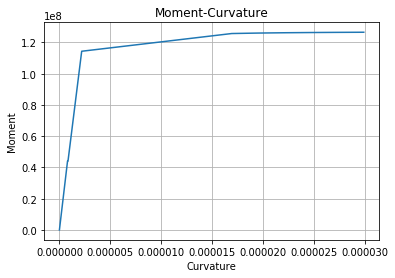

In [5]:
# Show plots 
plt.title("Moment-Curvature")
plt.xlabel('Curvature')
plt.ylabel('Moment')
plt.rcParams["figure.figsize"] = [10, 10]
plt.grid()
plt.plot(data_case_1_phi, data_case_1_m)
plt.show()